In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

([<matplotlib.patches.Wedge at 0x7c50a51297b0>,
 [Text(-0.44971325876899215, -1.0038714981945516, 'ham'),
  Text(0.4905963335602993, 1.095132520518495, 'spam')],
 [Text(-0.24529814114672294, -0.5475662717424826, '86.6%'),
  Text(0.2861811945768412, 0.6388273036357887, '13.4%')])

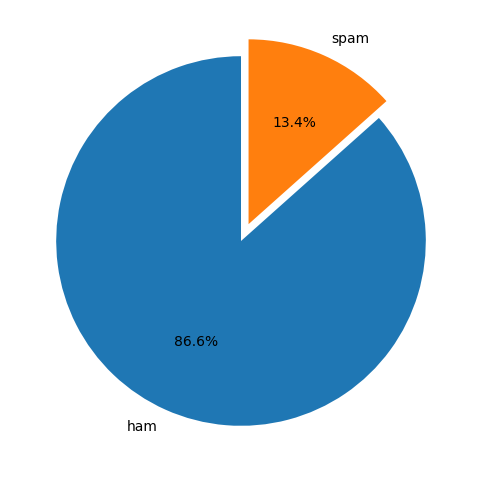

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(df['v1'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1))

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['v1'] = encoder.fit_transform(df['v1'])

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    ps = PorterStemmer()
    stemmed_text = [ps.stem(word) for word in filtered_text]
    return ' '.join(stemmed_text)
df['v2'] = df['v2'].apply(preprocess_text)

In [ ]:
from sklearn.model_selection import train_test_split
X = df['v2']
y = df['v1']
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train1)
X_test = vectorizer.transform(X_test1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')



print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")





Training Accuracy: 0.9928202827013687
Training Precision: 0.9928032754015003
Training Recall: 0.9928202827013687
Training F1 Score: 0.9928100750167473


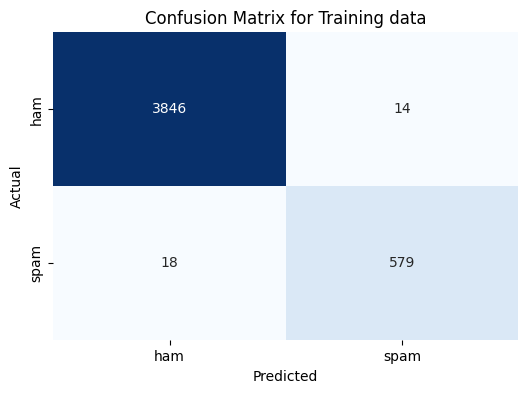

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training data')
plt.show()

In [ ]:
print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")



Testing Accuracy: 0.9838565022421525
Testing Precision: 0.9836997271560453
Testing Recall: 0.9838565022421525
Testing F1 Score: 0.9836686783500632


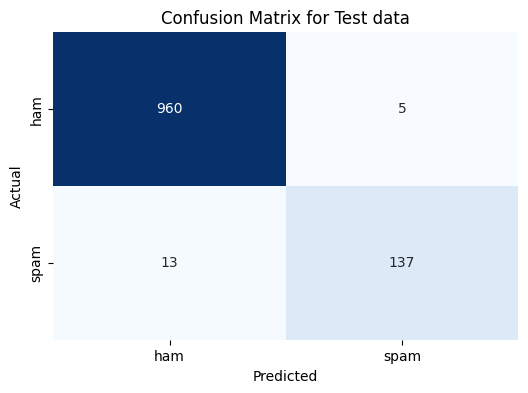

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test data')
plt.show()